# Import Libraries

In [91]:
import numpy as np
import pandas as pd

# Load data and Select Features

### Import Data

In [92]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [93]:
loan_data_inputs_train.head()

Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
427211        427211  12796369   14818505      24000        24000   
206088        206088   1439740    1691948      10000        10000   
136020        136020   5214749    6556909      20425        20425   
412305        412305  13827698   15890016      17200        17200   
36159          36159    422455     496525       8400         8400   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
427211          24000.0   36 months      8.90       762.08     A  ...   
206088          10000.0   36 months     14.33       343.39     C  ...   
136020          20425.0   36 months      8.90       648.56     A  ...   
412305          17200.0   36 months     16.59       609.73     D  ...   
36159            7450.0   36 months     12.84       282.40     C  ...   

       dti:21.7-22.4 dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
427211             1           0       0                              1   
206088             0           0       0                              1   
136020             0           0       0                              1   
412305             0           0       0                              1   
36159              0           1       0                              1   

        mths_since_last_record:0-2 mths_since_last_record:3-20  \
427211                           0                           0   
206088                           0                           0   
136020                           0                           0   
412305                           0                           0   
36159                            0                           0   

       mths_since_last_record:21-31 mths_since_last_record:32-80  \
427211                            0                            0   
206088                            0                            0   
136020                            0                            0   
412305                            0                            0   
36159                             0                            0   

       mths_since_last_record:81-86 mths_since_last_record:>86  
427211                            0                          0  
206088                            0                          0  
136020                            0                          0  
412305                            0                          0  
36159                             0                          0  

[5 rows x 324 columns]

In [94]:
loan_data_targets_train.head()

good_bad
427211         1
206088         1
136020         1
412305         0
36159          0

In [95]:
loan_data_inputs_train.shape

(373028, 324)

In [96]:
loan_data_targets_train.shape

(373028, 1)

In [97]:
loan_data_inputs_test.shape

(93257, 324)

In [98]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

For starter, use all features without the reference categories

In [99]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [100]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [101]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
427211              0  ...                               1   
206088              0  ...                               0   
136020              0  ...                               0   
412305              0  ...                               0   
36159               0  ...                               1   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
427211                            0                             0   
206088                            1                             0   
136020                            0                             1   
412305                            1                             0   
36159                             0                             0   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
427211                            0                               1   
206088                            0                               1   
136020                            0                               1   
412305                            0                               1   
36159                             0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
427211                            0                             0   
206088                            0                             0   
136020                            0                             0   
412305                            0                             0   
36159                             0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:>86  
427211                           0  
206088                           0  
136020                           0  
412305                           0  
36159                            0  

[5 rows x 104 columns]

# PD Model Estimation

## Logistic Regression
To predict a binary classification, we use logistic, later we also get the probability result.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [103]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [104]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [105]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-1.3310902])

In [107]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.16007611,  0.90604617,  0.70885707,  0.51905932,  0.33683783,
         0.14489822,  0.09079877,  0.10678399,  0.02966997,  0.05525431,
         0.05661316,  0.05940855,  0.07497801,  0.13245083,  0.09937047,
         0.18113001,  0.224976  ,  0.22035314,  0.25916108,  0.31663052,
         0.5175067 ,  0.08806898, -0.01075257,  0.30676806,  0.20251036,
         0.21415654,  0.26666905,  0.05443123,  0.07808038,  0.10017957,
         0.12530324,  0.08960188,  0.06084546,  0.1233464 ,  1.07505632,
         0.87435263,  0.77403308,  0.5729416 ,  0.41066369,  0.16587691,
        -0.06980801,  0.85057503,  0.53835231,  0.28958886,  0.10065261,
         0.05613874,  0.03784356,  0.07957206,  0.11956631,  0.12626331,
         0.0742846 ,  0.03130672,  0.6347607 ,  0.49136691,  0.28200207,
        -0.01100803, -0.10865444, -0.1343346 , -0.14974111, -0.15435549,
        -0.11931909, -0.20970682,  0.12264602,  0.17843051, -0.02093663,
         0.02532388,  0.21758046,  0.03470664,  0.0

In [108]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [109]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

Feature name  Coefficients
0                              Intercept     -1.331090
1                                grade:A      1.160076
2                                grade:B      0.906046
3                                grade:C      0.708857
4                                grade:D      0.519059
5                                grade:E      0.336838
6                                grade:F      0.144898
7                     home_ownership:OWN      0.090799
8                home_ownership:MORTGAGE      0.106784
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055254
11          addr_state:OK_TN_MO_LA_MD_NC      0.056613
12                         addr_state:CA      0.059409
13                addr_state:UT_KY_AZ_NJ      0.074978
14             addr_state:AR_MI_PA_OH_MN      0.132451
15             addr_state:RI_MA_DE_SD_IN      0.099370
16                   addr_state:GA_WA_OR      0.181130
17                      addr_state:WI_MT      0.224976
18                         addr_state:TX      0.220353
19                      addr_state:IL_CT      0.259161
20          addr_state:KS_SC_CO_VT_AK_MS      0.316631
21          addr_state:WV_NH_WY_DC_ME_ID      0.517507
22      verification_status:Not Verified      0.088069
23   verification_status:Source Verified     -0.010753
24                   purpose:credit_card      0.306768
25            purpose:debt_consolidation      0.202510
26            purpose:oth__med__vacation      0.214157
27   purpose:major_purch__car__home_impr      0.266669
28                 initial_list_status:w      0.054431
29                               term:36      0.078080
30                          emp_length:1      0.100180
31                        emp_length:2-4      0.125303
32                        emp_length:5-6      0.089602
33                        emp_length:7-9      0.060845
34                         emp_length:10      0.123346
35                mths_since_issue_d:<38      1.075056
36              mths_since_issue_d:38-39      0.874353
37              mths_since_issue_d:40-41      0.774033
38              mths_since_issue_d:42-48      0.572942
39              mths_since_issue_d:49-52      0.410664
40              mths_since_issue_d:53-64      0.165877
41              mths_since_issue_d:65-84     -0.069808
42                       int_rate:<9.548      0.850575
43                 int_rate:9.548-12.025      0.538352
44                 int_rate:12.025-15.74      0.289589
45                 int_rate:15.74-20.281      0.100653
46   mths_since_earliest_cr_line:141-164      0.056139
47   mths_since_earliest_cr_line:165-247      0.037844
48   mths_since_earliest_cr_line:248-270      0.079572
49   mths_since_earliest_cr_line:271-352      0.119566
50      mths_since_earliest_cr_line:>352      0.126263
51                         delinq_2yrs:0      0.074285
52                       delinq_2yrs:1-3      0.031307
53                      inq_last_6mths:0      0.634761
54                    inq_last_6mths:1-2      0.491367
55                    inq_last_6mths:3-6      0.282002
56                          open_acc:1-3     -0.011008
57                         open_acc:4-12     -0.108654
58                        open_acc:13-17     -0.134335
59                        open_acc:18-22     -0.149741
60                        open_acc:23-25     -0.154355
61                        open_acc:26-30     -0.119319
62                         open_acc:>=31     -0.209707
63                           pub_rec:3-4      0.122646
64                           pub_rec:>=5      0.178431
65                       total_acc:28-51     -0.020937
66                        total_acc:>=52      0.025324
67                    acc_now_delinq:>=1      0.217580
68               total_rev_hi_lim:5K-10K      0.034707
69              total_rev_hi_lim:10K-20K      0.002738
70              total_rev_hi_lim:20K-30K      0.001241
71              total_rev_hi_lim:30K-40K      0.014498
72           

## Build a Logistic Regression Model with P-Values

Not all our features are actually contributing to the model, this can be identified using their P-Values, P-values indicates the significance of a features. usually, p-value > 0.05 indicating unsignificance of that variable. in this case if a majority in that variables, say, Grade, 4 out of 7 grades is unsignificant, we drop all 7 the grades out of our model.

In [110]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [111]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [112]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [113]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                              Intercept     -1.331090
1                                grade:A      1.160076
2                                grade:B      0.906046
3                                grade:C      0.708857
4                                grade:D      0.519059
5                                grade:E      0.336838
6                                grade:F      0.144898
7                     home_ownership:OWN      0.090799
8                home_ownership:MORTGAGE      0.106784
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055254
11          addr_state:OK_TN_MO_LA_MD_NC      0.056613
12                         addr_state:CA      0.059409
13                addr_state:UT_KY_AZ_NJ      0.074978
14             addr_state:AR_MI_PA_OH_MN      0.132451
15             addr_state:RI_MA_DE_SD_IN      0.099370
16                   addr_state:GA_WA_OR      0.181130
17                      addr_state:WI_MT      0.224976
18                         addr_state:TX      0.220353
19                      addr_state:IL_CT      0.259161
20          addr_state:KS_SC_CO_VT_AK_MS      0.316631
21          addr_state:WV_NH_WY_DC_ME_ID      0.517507
22      verification_status:Not Verified      0.088069
23   verification_status:Source Verified     -0.010753
24                   purpose:credit_card      0.306768
25            purpose:debt_consolidation      0.202510
26            purpose:oth__med__vacation      0.214157
27   purpose:major_purch__car__home_impr      0.266669
28                 initial_list_status:w      0.054431
29                               term:36      0.078080
30                          emp_length:1      0.100180
31                        emp_length:2-4      0.125303
32                        emp_length:5-6      0.089602
33                        emp_length:7-9      0.060845
34                         emp_length:10      0.123346
35                mths_since_issue_d:<38      1.075056
36              mths_since_issue_d:38-39      0.874353
37              mths_since_issue_d:40-41      0.774033
38              mths_since_issue_d:42-48      0.572942
39              mths_since_issue_d:49-52      0.410664
40              mths_since_issue_d:53-64      0.165877
41              mths_since_issue_d:65-84     -0.069808
42                       int_rate:<9.548      0.850575
43                 int_rate:9.548-12.025      0.538352
44                 int_rate:12.025-15.74      0.289589
45                 int_rate:15.74-20.281      0.100653
46   mths_since_earliest_cr_line:141-164      0.056139
47   mths_since_earliest_cr_line:165-247      0.037844
48   mths_since_earliest_cr_line:248-270      0.079572
49   mths_since_earliest_cr_line:271-352      0.119566
50      mths_since_earliest_cr_line:>352      0.126263
51                         delinq_2yrs:0      0.074285
52                       delinq_2yrs:1-3      0.031307
53                      inq_last_6mths:0      0.634761
54                    inq_last_6mths:1-2      0.491367
55                    inq_last_6mths:3-6      0.282002
56                          open_acc:1-3     -0.011008
57                         open_acc:4-12     -0.108654
58                        open_acc:13-17     -0.134335
59                        open_acc:18-22     -0.149741
60                        open_acc:23-25     -0.154355
61                        open_acc:26-30     -0.119319
62                         open_acc:>=31     -0.209707
63                           pub_rec:3-4      0.122646
64                           pub_rec:>=5      0.178431
65                       total_acc:28-51     -0.020937
66                        total_acc:>=52      0.025324
67                    acc_now_delinq:>=1      0.217580
68               total_rev_hi_lim:5K-10K      0.034707
69              total_rev_hi_lim:10K-20K      0.002738
70              total_rev_hi_lim:20K-30K      0.001241
71              total_rev_hi_lim:30K-40K      0.014498
72           

In [115]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [116]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [117]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [118]:
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.331090            NaN
1                                grade:A      1.160076   1.710759e-37
2                                grade:B      0.906046   1.041760e-49
3                                grade:C      0.708857   6.557131e-36
4                                grade:D      0.519059   4.998979e-22
5                                grade:E      0.336838   2.510416e-12
6                                grade:F      0.144898   3.858473e-03
7                     home_ownership:OWN      0.090799   6.805715e-06
8                home_ownership:MORTGAGE      0.106784   4.240550e-17
9                       addr_state:NM_VA      0.029670   3.545543e-01
10                         addr_state:NY      0.055254   2.300097e-02
11          addr_state:OK_TN_MO_LA_MD_NC      0.056613   1.479785e-02
12                         addr_state:CA      0.059409   5.206666e-03
13                addr_state:UT_KY_AZ_NJ      0.074978   2.679628e-03
14             addr_state:AR_MI_PA_OH_MN      0.132451   4.604820e-09
15             addr_state:RI_MA_DE_SD_IN      0.099370   8.937941e-04
16                   addr_state:GA_WA_OR      0.181130   1.231220e-11
17                      addr_state:WI_MT      0.224976   2.093018e-06
18                         addr_state:TX      0.220353   2.599252e-17
19                      addr_state:IL_CT      0.259161   8.540586e-19
20          addr_state:KS_SC_CO_VT_AK_MS      0.316631   1.154164e-24
21          addr_state:WV_NH_WY_DC_ME_ID      0.517507   2.421713e-22
22      verification_status:Not Verified      0.088069   2.140876e-09
23   verification_status:Source Verified     -0.010753   4.249307e-01
24                   purpose:credit_card      0.306768   4.123638e-27
25            purpose:debt_consolidation      0.202510   1.002669e-14
26            purpose:oth__med__vacation      0.214157   7.168320e-12
27   purpose:major_purch__car__home_impr      0.266669   1.885146e-17
28                 initial_list_status:w      0.054431   3.067054e-05
29                               term:36      0.078080   3.689373e-08
30                          emp_length:1      0.100180   1.143210e-04
31                        emp_length:2-4      0.125303   3.322341e-11
32                        emp_length:5-6      0.089602   2.867581e-05
33                        emp_length:7-9      0.060845   3.462892e-03
34                         emp_length:10      0.123346   2.303098e-11
35                mths_since_issue_d:<38      1.075056  4.459298e-171
36              mths_since_issue_d:38-39      0.874353  6.693478e-141
37              mths_since_issue_d:40-41      0.774033  3.729051e-116
38              mths_since_issue_d:42-48      0.572942   4.313262e-81
39              mths_since_issue_d:49-52      0.410664   1.073366e-37
40              mths_since_issue_d:53-64      0.165877   3.728380e-08
41              mths_since_issue_d:65-84     -0.069808   1.734235e-02
42                       int_rate:<9.548      0.850575   4.849090e-29
43                 int_rate:9.548-12.025      0.538352   4.521520e-33
44                 int_rate:12.025-15.74      0.289589   4.664051e-15
45                 int_rate:15.74-20.281      0.100653   5.508270e-04
46   mths_since_earliest_cr_line:141-164      0.056139   2.464403e-02
47   mths_since_earliest_cr_line:165-247      0.037844   6.329949e-02
48   mths_since_earliest_cr_line:248-270      0.079572   2.794217e-03
49   mths_since_earliest_cr_line:271-352      0.119566   5.765566e-07
50      mths_since_earliest_cr_line:>352      0.126263   3.070585e-06
51                         delinq_2yrs:0      0.074285   1.935439e-01
52                       delinq_2yrs:1-3      0.031307   5.601844e-01
53                      inq_last_6mths:0      0.634761   3.628762e-08
54                    inq_last_6mths:1-2      0.491367   1.956458e-05
55                    inq_last_6mths:3-6      0.282002   1.468191e-02
56                          open_acc:1

In [119]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [120]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
427211              0  ...                               1   
206088              0  ...                               0   
136020              0  ...                               0   
412305              0  ...                               0   
36159               0  ...                               1   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
427211                            0                             0   
206088                            1                             0   
136020                            0                             1   
412305                            1                             0   
36159                             0                             0   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
427211                            0                               1   
206088                            0                               1   
136020                            0                               1   
412305                            0                               1   
36159                             0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
427211                            0                             0   
206088                            0                             0   
136020                            0                             0   
412305                            0                             0   
36159                             0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:>86  
427211                           0  
206088                           0  
136020                           0  
412305                           0  
36159                            0  

[5 rows x 84 columns]

In [121]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fadhl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
feature_name = inputs_train.columns.values

In [123]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept     -1.374030
1                               grade:A      1.123664
2                               grade:B      0.878917
3                               grade:C      0.684795
4                               grade:D      0.496923
5                               grade:E      0.321491
6                               grade:F      0.134283
7                    home_ownership:OWN      0.093515
8               home_ownership:MORTGAGE      0.106248
9                      addr_state:NM_VA      0.036018
10                        addr_state:NY      0.055556
11         addr_state:OK_TN_MO_LA_MD_NC      0.057996
12                        addr_state:CA      0.062150
13               addr_state:UT_KY_AZ_NJ      0.076459
14            addr_state:AR_MI_PA_OH_MN      0.133441
15            addr_state:RI_MA_DE_SD_IN      0.097895
16                  addr_state:GA_WA_OR      0.183762
17                     addr_state:WI_MT      0.237908
18                        addr_state:TX      0.220959
19                     addr_state:IL_CT      0.259900
20         addr_state:KS_SC_CO_VT_AK_MS      0.318563
21         addr_state:WV_NH_WY_DC_ME_ID      0.521966
22     verification_status:Not Verified      0.085718
23  verification_status:Source Verified     -0.011185
24                  purpose:credit_card      0.301858
25           purpose:debt_consolidation      0.198087
26           purpose:oth__med__vacation      0.212825
27  purpose:major_purch__car__home_impr      0.266262
28                initial_list_status:w      0.053827
29                              term:36      0.078942
30                         emp_length:1      0.099158
31                       emp_length:2-4      0.125853
32                       emp_length:5-6      0.091092
33                       emp_length:7-9      0.061144
34                        emp_length:10      0.125043
35               mths_since_issue_d:<38      1.084208
36             mths_since_issue_d:38-39      0.879196
37             mths_since_issue_d:40-41      0.778254
38             mths_since_issue_d:42-48      0.577164
39             mths_since_issue_d:49-52      0.415690
40             mths_since_issue_d:53-64      0.169939
41             mths_since_issue_d:65-84     -0.071786
42                      int_rate:<9.548      0.883144
43                int_rate:9.548-12.025      0.558666
44                int_rate:12.025-15.74      0.306133
45                int_rate:15.74-20.281      0.113170
46  mths_since_earliest_cr_line:141-164      0.055772
47  mths_since_earliest_cr_line:165-247      0.037163
48  mths_since_earliest_cr_line:248-270      0.079480
49  mths_since_earliest_cr_line:271-352      0.122042
50     mths_since_earliest_cr_line:>352      0.129361
51                     inq_last_6mths:0      0.666263
52                   inq_last_6mths:1-2      0.519758
53                   inq_last_6mths:3-6      0.309539
54                   acc_now_delinq:>=1      0.180366
55                   annual_inc:20K-30K     -0.081518
56                   annual_inc:30K-40K     -0.018921
57                   annual_inc:40K-50K      0.075681
58                   annual_inc:50K-60K      0.142548
59                   annual_inc:60K-70K      0.218097
60                   annual_inc:70K-80K      0.291547
61                   annual_inc:80K-90K      0.367392
62                  annual_inc:90K-100K      0.387199
63                 annual_inc:100K-120K      0.465102
64                 annual_inc:120K-140K      0.552378
65                     annual_inc:>140K      0.491546
66                            dti:<=1.4      0.252461
67                          dti:1.4-3.5      0.371540
68                          dti:3.5-7.7      0.384449
69                         dti:7.7-10.5      0.319716
70                        dti:10.5-16.1      0.241146
71                        dti:16.1-20.3      0.139841
72                        dti:20.3-21.7      0.127461
73                        dti:2

In [124]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

Feature name  Coefficients       p_values
0                             Intercept     -1.374030            NaN
1                               grade:A      1.123664   3.226778e-35
2                               grade:B      0.878917   4.279718e-47
3                               grade:C      0.684795   6.713866e-34
4                               grade:D      0.496923   1.347072e-20
5                               grade:E      0.321491   1.025543e-11
6                               grade:F      0.134283   6.242108e-03
7                    home_ownership:OWN      0.093515   3.461324e-06
8               home_ownership:MORTGAGE      0.106248   4.422278e-17
9                      addr_state:NM_VA      0.036018   2.608577e-01
10                        addr_state:NY      0.055556   2.183012e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057996   1.225871e-02
12                        addr_state:CA      0.062150   3.375464e-03
13               addr_state:UT_KY_AZ_NJ      0.076459   2.148830e-03
14            addr_state:AR_MI_PA_OH_MN      0.133441   3.149779e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033188e-03
16                  addr_state:GA_WA_OR      0.183762   5.573702e-12
17                     addr_state:WI_MT      0.237908   5.630503e-07
18                        addr_state:TX      0.220959   1.836872e-17
19                     addr_state:IL_CT      0.259900   5.676251e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318563   5.120678e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521966   1.071545e-22
22     verification_status:Not Verified      0.085718   4.378242e-09
23  verification_status:Source Verified     -0.011185   4.049390e-01
24                  purpose:credit_card      0.301858   1.253817e-26
25           purpose:debt_consolidation      0.198087   2.502115e-14
26           purpose:oth__med__vacation      0.212825   7.729123e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473196e-17
28                initial_list_status:w      0.053827   3.739377e-05
29                              term:36      0.078942   1.630794e-08
30                         emp_length:1      0.099158   1.314543e-04
31                       emp_length:2-4      0.125853   2.595321e-11
32                       emp_length:5-6      0.091092   2.081452e-05
33                       emp_length:7-9      0.061144   3.286589e-03
34                        emp_length:10      0.125043   1.179341e-11
35               mths_since_issue_d:<38      1.084208  4.744179e-181
36             mths_since_issue_d:38-39      0.879196  1.028467e-149
37             mths_since_issue_d:40-41      0.778254  5.648183e-124
38             mths_since_issue_d:42-48      0.577164   1.082757e-87
39             mths_since_issue_d:49-52      0.415690   8.251546e-41
40             mths_since_issue_d:53-64      0.169939   5.947579e-09
41             mths_since_issue_d:65-84     -0.071786   1.407493e-02
42                      int_rate:<9.548      0.883144   3.584866e-31
43                int_rate:9.548-12.025      0.558666   5.927139e-36
44                int_rate:12.025-15.74      0.306133   7.241998e-17
45                int_rate:15.74-20.281      0.113170   9.359249e-05
46  mths_since_earliest_cr_line:141-164      0.055772   2.497911e-02
47  mths_since_earliest_cr_line:165-247      0.037163   6.424242e-02
48  mths_since_earliest_cr_line:248-270      0.079480   2.453707e-03
49  mths_since_earliest_cr_line:271-352      0.122042   1.891997e-07
50     mths_since_earliest_cr_line:>352      0.129361   1.069200e-06
51                     inq_last_6mths:0      0.666263   3.528130e-14
52                   inq_last_6mths:1-2      0.519758   3.248122e-09
53                   inq_last_6mths:3-6      0.309539   4.608081e-04
54                   acc_now_delinq:>=1      0.180366   8.867777e-02
55                   annual_inc:20K-30K     -0.081518   5.300258e-02
56                   annual_inc:30K-40K     -0.018921   6.402285e-01
57                   annu

In [125]:
import pickle

In [126]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

we will measure the model performance by measuring their metrics, for a binary classification, Accuracy is not enough, there is precision and recall, also we will plot the ROC Curve and AUC Score.

In [127]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [128]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [129]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
362514              0  ...                               1   
288564              0  ...                               0   
213591              0  ...                               0   
263083              0  ...                               1   
165001              0  ...                               0   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
362514                            0                             0   
288564                            0                             0   
213591                            0                             1   
263083                            0                             0   
165001                            0                             1   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
362514                            0                               1   
288564                            0                               1   
213591                            0                               1   
263083                            0                               1   
165001                            0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
362514                            0                             0   
288564                            0                             0   
213591                            0                             0   
263083                            0                             0   
165001                            0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             0   
165001                             0                             0   

        mths_since_last_record:>86  
362514                           0  
288564                           0  
213591                           0  
263083                           0  
165001                           0  

[5 rows x 84 columns]

In [130]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [131]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [132]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [133]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.07569439, 0.92430561],
       [0.1507612 , 0.8492388 ],
       [0.11465098, 0.88534902],
       ...,
       [0.02678661, 0.97321339],
       [0.04020862, 0.95979138],
       [0.0476335 , 0.9523665 ]])

In [134]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.92430561, 0.8492388 , 0.88534902, ..., 0.97321339, 0.95979138,
       0.9523665 ])

In [135]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [136]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.92430561, 0.8492388 , 0.88534902, ..., 0.97321339, 0.95979138,
       0.9523665 ])

In [137]:
loan_data_targets_test_temp = loan_data_targets_test

In [138]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [139]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [140]:
df_actual_predicted_probs.shape

(93257, 2)

In [141]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [142]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [143]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
362514                       1          0.924306
288564                       1          0.849239
213591                       1          0.885349
263083                       1          0.940636
165001                       1          0.968665

### Accuracy and Area under the Curve

In [144]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [145]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted      0      1
Actual                 
0           7374   2816
1          35813  47254

In [146]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted         0         1
Actual                       
0          0.079072  0.030196
1          0.384025  0.506707

In [147]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5857790836076648

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

In [149]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262868, 0.99262868, 0.99069776, ..., 0.48790833, 0.3937376 ,
        0.37528438]))

In [150]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

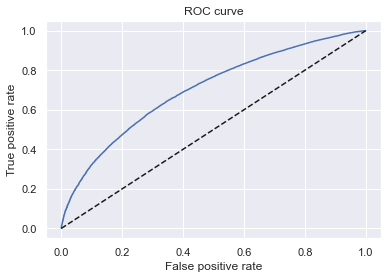

In [152]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [153]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7022081061750489

### Gini and Kolmogorov-Smirnov

In [154]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [155]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
42341                       1          0.375284           0
42344                       1          0.392101           0
39810                       0          0.393738           0
40518                       0          0.448968           0
42396                       0          0.457734           0

In [156]:
df_actual_predicted_probs.tail()

loan_data_targets_test  y_hat_test_proba  y_hat_test
262480                       1          0.991292           1
231463                       1          0.991304           1
239228                       1          0.991652           1
261086                       1          0.992058           1
242624                       1          0.992629           1

In [157]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [158]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  42341                       1          0.375284           0
1  42344                       1          0.392101           0
2  39810                       0          0.393738           0
3  40518                       0          0.448968           0
4  42396                       0          0.457734           0

In [159]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [160]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.375284           0   
1  42344                       1          0.392101           0   
2  39810                       0          0.393738           0   
3  40518                       0          0.448968           0   
4  42396                       0          0.457734           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  1                 0  
1                        2                  2                 0  
2                        3                  2                 1  
3                        4                  2                 2  
4                        5                  2                 3

In [161]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [162]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.375284           0   
1  42344                       1          0.392101           0   
2  39810                       0          0.393738           0   
3  40518                       0          0.448968           0   
4  42396                       0          0.457734           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  1                 0   
1                        2                  2                 0   
2                        3                  2                 1   
3                        4                  2                 2   
4                        5                  2                 3   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011              0.000012             0.000000  
1                    0.000021              0.000024             0.000000  
2                    0.000032              0.000024             0.000098  
3                    0.000043              0.000024             0.000196  
4                    0.000054              0.000024             0.000294

In [163]:
df_actual_predicted_probs.tail()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
93252  262480                       1          0.991292           1   
93253  231463                       1          0.991304           1   
93254  239228                       1          0.991652           1   
93255  261086                       1          0.992058           1   
93256  242624                       1          0.992629           1   

       Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
93252                    93253              83063             10190   
93253                    93254              83064             10190   
93254                    93255              83065             10190   
93255                    93256              83066             10190   
93256                    93257              83067             10190   

       Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
93252                    0.999957              0.999952                  1.0  
93253                    0.999968              0.999964                  1.0  
93254                    0.999979              0.999976                  1.0  
93255                    0.999989              0.999988                  1.0  
93256                    1.000000              1.000000                  1.0

Text(0.5, 1.0, 'Gini')

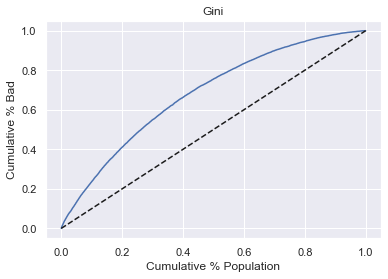

In [164]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [165]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.40441621235009784

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

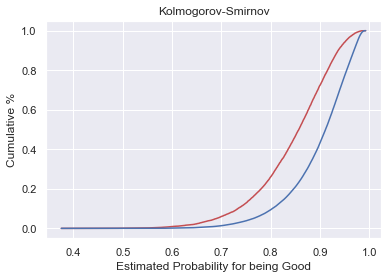

In [166]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [167]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2966746932223847

# Applying the PD Model

### Calculating PD of individual accounts

In [168]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [169]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [170]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.374030            NaN
1                               grade:A      1.123664   3.226778e-35
2                               grade:B      0.878917   4.279718e-47
3                               grade:C      0.684795   6.713866e-34
4                               grade:D      0.496923   1.347072e-20
5                               grade:E      0.321491   1.025543e-11
6                               grade:F      0.134283   6.242108e-03
7                    home_ownership:OWN      0.093515   3.461324e-06
8               home_ownership:MORTGAGE      0.106248   4.422278e-17
9                      addr_state:NM_VA      0.036018   2.608577e-01
10                        addr_state:NY      0.055556   2.183012e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057996   1.225871e-02
12                        addr_state:CA      0.062150   3.375464e-03
13               addr_state:UT_KY_AZ_NJ      0.076459   2.148830e-03
14            addr_state:AR_MI_PA_OH_MN      0.133441   3.149779e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033188e-03
16                  addr_state:GA_WA_OR      0.183762   5.573702e-12
17                     addr_state:WI_MT      0.237908   5.630503e-07
18                        addr_state:TX      0.220959   1.836872e-17
19                     addr_state:IL_CT      0.259900   5.676251e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318563   5.120678e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521966   1.071545e-22
22     verification_status:Not Verified      0.085718   4.378242e-09
23  verification_status:Source Verified     -0.011185   4.049390e-01
24                  purpose:credit_card      0.301858   1.253817e-26
25           purpose:debt_consolidation      0.198087   2.502115e-14
26           purpose:oth__med__vacation      0.212825   7.729123e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473196e-17
28                initial_list_status:w      0.053827   3.739377e-05
29                              term:36      0.078942   1.630794e-08
30                         emp_length:1      0.099158   1.314543e-04
31                       emp_length:2-4      0.125853   2.595321e-11
32                       emp_length:5-6      0.091092   2.081452e-05
33                       emp_length:7-9      0.061144   3.286589e-03
34                        emp_length:10      0.125043   1.179341e-11
35               mths_since_issue_d:<38      1.084208  4.744179e-181
36             mths_since_issue_d:38-39      0.879196  1.028467e-149
37             mths_since_issue_d:40-41      0.778254  5.648183e-124
38             mths_since_issue_d:42-48      0.577164   1.082757e-87
39             mths_since_issue_d:49-52      0.415690   8.251546e-41
40             mths_since_issue_d:53-64      0.169939   5.947579e-09
41             mths_since_issue_d:65-84     -0.071786   1.407493e-02
42                      int_rate:<9.548      0.883144   3.584866e-31
43                int_rate:9.548-12.025      0.558666   5.927139e-36
44                int_rate:12.025-15.74      0.306133   7.241998e-17
45                int_rate:15.74-20.281      0.113170   9.359249e-05
46  mths_since_earliest_cr_line:141-164      0.055772   2.497911e-02
47  mths_since_earliest_cr_line:165-247      0.037163   6.424242e-02
48  mths_since_earliest_cr_line:248-270      0.079480   2.453707e-03
49  mths_since_earliest_cr_line:271-352      0.122042   1.891997e-07
50     mths_since_earliest_cr_line:>352      0.129361   1.069200e-06
51                     inq_last_6mths:0      0.666263   3.528130e-14
52                   inq_last_6mths:1-2      0.519758   3.248122e-09
53                   inq_last_6mths:3-6      0.309539   4.608081e-04
54                   acc_now_delinq:>=1      0.180366   8.867777e-02
55                   annual_inc:20K-30K     -0.081518   5.300258e-02
56                   annual_inc:30K-40K     -0.018921   6.402285e-01
57                   annu

In [171]:
y_hat_test_proba

array([0.92430561, 0.8492388 , 0.88534902, ..., 0.97321339, 0.95979138,
       0.9523665 ])

### Creating a Scorecard

In [172]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.374030            NaN
1                               grade:A      1.123664   3.226778e-35
2                               grade:B      0.878917   4.279718e-47
3                               grade:C      0.684795   6.713866e-34
4                               grade:D      0.496923   1.347072e-20
5                               grade:E      0.321491   1.025543e-11
6                               grade:F      0.134283   6.242108e-03
7                    home_ownership:OWN      0.093515   3.461324e-06
8               home_ownership:MORTGAGE      0.106248   4.422278e-17
9                      addr_state:NM_VA      0.036018   2.608577e-01
10                        addr_state:NY      0.055556   2.183012e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057996   1.225871e-02
12                        addr_state:CA      0.062150   3.375464e-03
13               addr_state:UT_KY_AZ_NJ      0.076459   2.148830e-03
14            addr_state:AR_MI_PA_OH_MN      0.133441   3.149779e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033188e-03
16                  addr_state:GA_WA_OR      0.183762   5.573702e-12
17                     addr_state:WI_MT      0.237908   5.630503e-07
18                        addr_state:TX      0.220959   1.836872e-17
19                     addr_state:IL_CT      0.259900   5.676251e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318563   5.120678e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521966   1.071545e-22
22     verification_status:Not Verified      0.085718   4.378242e-09
23  verification_status:Source Verified     -0.011185   4.049390e-01
24                  purpose:credit_card      0.301858   1.253817e-26
25           purpose:debt_consolidation      0.198087   2.502115e-14
26           purpose:oth__med__vacation      0.212825   7.729123e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473196e-17
28                initial_list_status:w      0.053827   3.739377e-05
29                              term:36      0.078942   1.630794e-08
30                         emp_length:1      0.099158   1.314543e-04
31                       emp_length:2-4      0.125853   2.595321e-11
32                       emp_length:5-6      0.091092   2.081452e-05
33                       emp_length:7-9      0.061144   3.286589e-03
34                        emp_length:10      0.125043   1.179341e-11
35               mths_since_issue_d:<38      1.084208  4.744179e-181
36             mths_since_issue_d:38-39      0.879196  1.028467e-149
37             mths_since_issue_d:40-41      0.778254  5.648183e-124
38             mths_since_issue_d:42-48      0.577164   1.082757e-87
39             mths_since_issue_d:49-52      0.415690   8.251546e-41
40             mths_since_issue_d:53-64      0.169939   5.947579e-09
41             mths_since_issue_d:65-84     -0.071786   1.407493e-02
42                      int_rate:<9.548      0.883144   3.584866e-31
43                int_rate:9.548-12.025      0.558666   5.927139e-36
44                int_rate:12.025-15.74      0.306133   7.241998e-17
45                int_rate:15.74-20.281      0.113170   9.359249e-05
46  mths_since_earliest_cr_line:141-164      0.055772   2.497911e-02
47  mths_since_earliest_cr_line:165-247      0.037163   6.424242e-02
48  mths_since_earliest_cr_line:248-270      0.079480   2.453707e-03
49  mths_since_earliest_cr_line:271-352      0.122042   1.891997e-07
50     mths_since_earliest_cr_line:>352      0.129361   1.069200e-06
51                     inq_last_6mths:0      0.666263   3.528130e-14
52                   inq_last_6mths:1-2      0.519758   3.248122e-09
53                   inq_last_6mths:3-6      0.309539   4.608081e-04
54                   acc_now_delinq:>=1      0.180366   8.867777e-02
55                   annual_inc:20K-30K     -0.081518   5.300258e-02
56                   annual_inc:30K-40K     -0.018921   6.402285e-01
57                   annu

In [173]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [174]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

Feature name  Coefficients  p_values
0                                        grade:G             0       NaN
1             home_ownership:RENT_OTHER_NONE_ANY             0       NaN
2                addr_state:ND_NE_IA_NV_FL_HI_AL             0       NaN
3                   verification_status:Verified             0       NaN
4   purpose:educ__sm_b__wedd__ren_en__mov__house             0       NaN
5                          initial_list_status:f             0       NaN
6                                        term:60             0       NaN
7                                   emp_length:0             0       NaN
8                         mths_since_issue_d:>84             0       NaN
9                               int_rate:>20.281             0       NaN
10              mths_since_earliest_cr_line:<140             0       NaN
11                             inq_last_6mths:>6             0       NaN
12                              acc_now_delinq:0             0       NaN
13                               annual_inc:<20K             0       NaN
14                                       dti:>35             0       NaN
15                    mths_since_last_delinq:0-3             0       NaN
16                    mths_since_last_record:0-2             0       NaN

In [175]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

In [176]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

In [177]:
min_score = 300
max_score = 850

In [178]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                     -1.374030
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081518
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071786
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011185
Name: Coefficients, dtype: float64

In [179]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.5385202459044736

In [180]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.374030
acc_now_delinq                 0.180366
addr_state                     0.521966
annual_inc                     0.552378
dti                            0.384449
emp_length                     0.125853
grade                          1.123664
home_ownership                 0.106248
initial_list_status            0.053827
inq_last_6mths                 0.666263
int_rate                       0.883144
mths_since_earliest_cr_line    0.129361
mths_since_issue_d             1.084208
mths_since_last_delinq         0.183092
mths_since_last_record         0.502953
purpose                        0.301858
term                           0.078942
verification_status            0.085718
Name: Coefficients, dtype: float64

In [181]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.590260173249319

In [182]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

In [183]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

<ipython-input-183-6383eee17b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

In [184]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

At worst case scenario, a person will have credit score about 313

In [185]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [186]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

In [187]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [208]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard.sort_values('Difference', ascending=False)

index                                  Feature name  Coefficients  \
78      78                   mths_since_last_delinq:>=57      0.136103   
75      75                mths_since_last_delinq:Missing      0.110414   
38      38                      mths_since_issue_d:42-48      0.577164   
56      56                            annual_inc:30K-40K     -0.018921   
27      27           purpose:major_purch__car__home_impr      0.266262   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
76      76                   mths_since_last_delinq:4-30      0.136952   
83      83                  mths_since_last_record:81-86      0.175839   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
70      70                                 dti:10.5-16.1      0.241146   
22      22              verification_status:Not Verified      0.085718   
64      64                          annual_inc:120K-140K      0.552378   
44      44                         int_rate:12.025-15.74      0.306133   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
30      30                                  emp_length:1      0.099158   
68      68                                   dti:3.5-7.7      0.384449   
67      67                                   dti:1.4-3.5      0.371540   
69      69                                  dti:7.7-10.5      0.319716   
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
31      31                                emp_length:2-4      0.125853   
55      55                            annual_inc:20K-30K     -0.081518   
33      33                                emp_length:7-9      0.061144   
45      45                         int_rate:15.74-20.281      0.113170   
79      79                mths_since_last_record:Missing      0.320874   
9        9                              addr_state:NM_VA      0.036018   
71      71                                 dti:16.1-20.3      0.139841   
12      12                                 addr_state:CA      0.062150   
5        5                                       grade:E      0.321491   
82      82                  mths_since_last_record:32-80      0.502953   
2        2                                       grade:B      0.878917   
59      59                            annual_inc:60K-70K      0.218097   
36      36                      mths_since_issue_d:38-39      0.879196   
3        3                                       grade:C      0.684795   
72      72                                 dti:20.3-21.7      0.127461   
57      57                            annual_inc:40K-50K      0.075681   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
62      62                           annual_inc:90K-100K      0.387199   
74      74                                   dti:22.4-35      0.050268   
53      53                            inq_last_6mths:3-6      0.309539   
63      63                          annual_inc:100K-120K      0.465102   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
54      54                            acc_now_delinq:>=1      0.180366   
65      65                              annual_inc:>140K      0.491546   
84      84                    mths_since_last_record:>86      0.232704   
50      50              mths_since_earliest_cr_line:>352      0.129361   
80      80                   mths_since_last_record:3-20      0.440624   
58      58                            annual_inc:50K-60K      0.142548   
100     15                    mths_since_last_delinq:0-3      0.000000   
90       5                         initial_list_status:f      0.000000   
99      14                                       dti:>35      0.000000   
98      13                               annual_inc:<20K      0.000000   
89       

In [210]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][64] = 42
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
print(min_sum_score_prel, max_sum_score_prel)

300.0 850.0


<ipython-input-210-f4817e1ee790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][64] = 42


### Caclulating Credit Score

In [211]:
inputs_test_with_ref_cat.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514        0                                   0                   0   
288564        0                                   0                   0   
213591        0                                   0                   0   
263083        0                                   0                   0   
165001        0                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1  

In [212]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374030   
1        1                                       grade:A      1.123664   
2        2                                       grade:B      0.878917   
3        3                                       grade:C      0.684795   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321491   
6        6                                       grade:F      0.134283   
7        7                            home_ownership:OWN      0.093515   
8        8                       home_ownership:MORTGAGE      0.106248   
9        9                              addr_state:NM_VA      0.036018   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057996   
12      12                                 addr_state:CA      0.062150   
13      13                        addr_state:UT_KY_AZ_NJ      0.076459   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133441   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237908   
18      18                                 addr_state:TX      0.220959   
19      19                              addr_state:IL_CT      0.259900   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318563   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521966   
22      22              verification_status:Not Verified      0.085718   
23      23           verification_status:Source Verified     -0.011185   
24      24                           purpose:credit_card      0.301858   
25      25                    purpose:debt_consolidation      0.198087   
26      26                    purpose:oth__med__vacation      0.212825   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053827   
29      29                                       term:36      0.078942   
30      30                                  emp_length:1      0.099158   
31      31                                emp_length:2-4      0.125853   
32      32                                emp_length:5-6      0.091092   
33      33                                emp_length:7-9      0.061144   
34      34                                 emp_length:10      0.125043   
35      35                        mths_since_issue_d:<38      1.084208   
36      36                      mths_since_issue_d:38-39      0.879196   
37      37                      mths_since_issue_d:40-41      0.778254   
38      38                      mths_since_issue_d:42-48      0.577164   
39      39                      mths_since_issue_d:49-52      0.415690   
40      40                      mths_since_issue_d:53-64      0.169939   
41      41                      mths_since_issue_d:65-84     -0.071786   
42      42                               int_rate:<9.548      0.883144   
43      43                         int_rate:9.548-12.025      0.558666   
44      44                         int_rate:12.025-15.74      0.306133   
45      45                         int_rate:15.74-20.281      0.113170   
46      46           mths_since_earliest_cr_line:141-164      0.055772   
47      47           mths_since_earliest_cr_line:165-247      0.037163   
48      48           mths_since_earliest_cr_line:248-270      0.079480   
49      49           mths_since_earliest_cr_line:271-352      0.122042   
50      50              mths_since_earliest_cr_line:>352      0.129361   
51      51                              inq_last_6mths:0      0.666263   
52      52                            inq_last_6mths:1-2      0.519758   
53      5

In [213]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [214]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

ValueError: cannot insert Intercept, already exists

In [215]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514        0                                   0                   0   
288564        0                                   0                   0   
213591        0                                   0                   0   
263083        0                                   0                   0   
165001        0                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1  

In [216]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [217]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                   

In [218]:
scorecard_scores = df_scorecard['Score - Final']

In [219]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [220]:
scorecard_scores.shape

(102,)

In [226]:
#reshape so it compatible for multiplication later
scorecard_scores = scorecard_scores.values.reshape(102, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [227]:
scorecard_scores.shape

(102, 1)

In [228]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [229]:
y_scores.head()

0
362514  614.0
288564  553.0
213591  577.0
263083  633.0
165001  683.0

In [225]:
y_scores.tail()

0
115     573.0
296284  679.0
61777   696.0
91763   664.0
167512  651.0

# From Credit Score to PD

in short, we can just reverse the previous process.

In [230]:
sum_coef_from_score = ((y_scores - min_score)/(max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [231]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score)+1)
y_hat_proba_from_score.head()

0
362514  0.926312
288564  0.850778
213591  0.886129
263083  0.941455
165001  0.968498

In [232]:
y_hat_test_proba[0:5]

array([0.92430561, 0.8492388 , 0.88534902, 0.94063583, 0.96866479])

The probability is very close, but not same, it is because we rounded the score from previous process

# The Cut-offs
who will be granted loan and who wont be granted loan?
its a trade-off, say a bank only want grant loan to a person with great credit score, that means the cut-off is high resulting fewer loan given, but in the same time the bank is giving loan to high quality borrower.

flip the coin, if bank want to grant more loan, that mean the bank has to lower the cut-offs, resulting giving more loan potentially to  low quality borrower.

in shorts, if the bank want more business, grant more loan, lower the cut-off threshold, bear higher risk, but also higher potential profit.
if the bank want more guarantee in profit, raise the cut-off threshold, resulting only giving loan to high quality borrower, expose to risk is lower, but also lower profit.

In [150]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

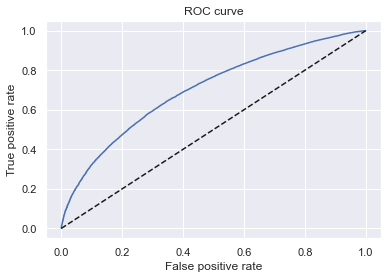

In [152]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [237]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [238]:
df_cutoffs.head()

thresholds       fpr       tpr
0    1.992629  0.000000  0.000000
1    0.992629  0.000000  0.000012
2    0.990698  0.000000  0.000120
3    0.990653  0.000098  0.000120
4    0.989762  0.000098  0.000433

In [239]:
df_cutoffs.thresholds[0] = 1-1 / np.power(10,16)
df_cutoffs.head()

thresholds       fpr       tpr
0    1.000000  0.000000  0.000000
1    0.992629  0.000000  0.000012
2    0.990698  0.000000  0.000120
3    0.990653  0.000098  0.000120
4    0.989762  0.000098  0.000433

In [242]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds']))-min_sum_coef)*((max_score-min_score)/(max_sum_coef-min_sum_coef))+min_score)

In [243]:
df_cutoffs.head()

thresholds       fpr       tpr        Score
0    1.000000  0.000000  0.000000  2066.037490
1    0.992629  0.000000  0.000012   796.957897
2    0.990698  0.000000  0.000120   778.857641
3    0.990653  0.000098  0.000120   778.485487
4    0.989762  0.000098  0.000433   771.385872

In [244]:
df_cutoffs.Score[0] = 850
df_cutoffs.head()

thresholds       fpr       tpr       Score
0    1.000000  0.000000  0.000000  850.000000
1    0.992629  0.000000  0.000012  796.957897
2    0.990698  0.000000  0.000120  778.857641
3    0.990653  0.000098  0.000120  778.485487
4    0.989762  0.000098  0.000433  771.385872

In [245]:
df_cutoffs.tail()

thresholds       fpr       tpr       Score
17251    0.493409  0.999411  0.999964  416.665732
17252    0.488602  0.999607  0.999964  415.181829
17253    0.487908  0.999607  0.999976  414.967669
17254    0.393738  1.000000  0.999976  385.398986
17255    0.375284  1.000000  1.000000  379.382343

In [246]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [248]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejected Rate'] = 1 - df_cutoffs['Approval Rate']

In [249]:
df_cutoffs

thresholds       fpr       tpr       Score  N Approved  N Rejected  \
0        1.000000  0.000000  0.000000  850.000000           0       93257   
1        0.992629  0.000000  0.000012  796.957897           1       93256   
2        0.990698  0.000000  0.000120  778.857641          10       93247   
3        0.990653  0.000098  0.000120  778.485487          11       93246   
4        0.989762  0.000098  0.000433  771.385872          37       93220   
5        0.989761  0.000196  0.000433  771.385687          38       93219   
6        0.988947  0.000196  0.000927  765.414576          79       93178   
7        0.988943  0.000294  0.000927  765.386676          80       93177   
8        0.986499  0.000294  0.004671  749.791281         391       92866   
9        0.986493  0.000393  0.004671  749.755062         392       92865   
10       0.984842  0.000393  0.008704  740.727218         727       92530   
11       0.984827  0.000491  0.008704  740.652665         728       92529   
12       0.984502  0.000491  0.009823  738.992836         821       92436   
13       0.984502  0.000589  0.009823  738.990756         822       92435   
14       0.984087  0.000589  0.011328  736.921485         947       92310   
15       0.984083  0.000687  0.011328  736.898717         948       92309   
16       0.983715  0.000687  0.012580  735.108771        1052       92205   
17       0.983713  0.000785  0.012580  735.095581        1053       92204   
18       0.983679  0.000785  0.012785  734.933142        1070       92187   
19       0.983677  0.000883  0.012785  734.926420        1071       92186   
20       0.983315  0.000883  0.014109  733.204018        1181       92076   
21       0.983308  0.000981  0.014109  733.172576        1182       92075   
22       0.983021  0.000981  0.015349  731.835578        1285       91972   
23       0.983010  0.001178  0.015349  731.782800        1287       91970   
24       0.982937  0.001178  0.015602  731.446049        1308       91949   
25       0.982929  0.001374  0.015602  731.407218        1310       91947   
26       0.982864  0.001374  0.015963  731.110616        1340       91917   
27       0.982850  0.001472  0.015963  731.044909        1341       91916   
28       0.982824  0.001472  0.016144  730.929175        1356       91901   
29       0.982824  0.001570  0.016144  730.926596        1357       91900   
30       0.982755  0.001570  0.016493  730.612864        1386       91871   
31       0.982753  0.001668  0.016493  730.604713        1387       91870   
32       0.982656  0.001668  0.016998  730.161595        1429       91828   
33       0.982655  0.001766  0.016998  730.159737        1430       91827   
34       0.982408  0.001766  0.018058  729.050764        1518       91739   
35       0.982406  0.001865  0.018058  729.039727        1519       91738   
36       0.982278  0.001865  0.018840  728.472308        1584       91673   
37       0.982278  0.001963  0.018840  728.470409        1585       91672   
38       0.982177  0.001963  0.019250  728.025015        1619       91638   
39       0.982172  0.002061  0.019250  728.002841        1620       91637   
40       0.981739  0.002061  0.021055  726.116463        1770       91487   
41       0.981739  0.002061  0.021079  726.115613        1772       91485   
42       0.981724  0.002061  0.021152  726.052887        1778       91479   
43       0.981723  0.002159  0.021152  726.047436        1779       91478   
44       0.981689  0.002159  0.021320  725.903798        1793       91464   
45       0.981674  0.002257  0.021320  725.835458        1794       91463   
46       0.981634  0.002257  0.021465  725.666800        1806       91451   
47       0.981634  0.002355  0.021465  725.664159        1807       91450   
48       0.981521  0.002355  0.021994  725.186042        1851       91406   
49       0.981519  0.002453  0.021994  725.174950        1852       91405   
50       0.981472  0.002453  0.022187  724.974328        1868       91389   
51 

In [250]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('df_scorecard.csv')